In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np

from tqdm import tqdm


In [63]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [64]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [70]:
import librosa

audio_file_path = "/Users/akselkantar/Desktop/Python-Projects/UrbanSoundClassification/UrbanSounds/audio/fold1/14113-4-0-0.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

print(librosa_audio_data)
librosa_audio_data.shape

[ 0.00135311  0.00180685  0.00078417 ... -0.00345659 -0.00723852
 -0.00119278]


(88200,)

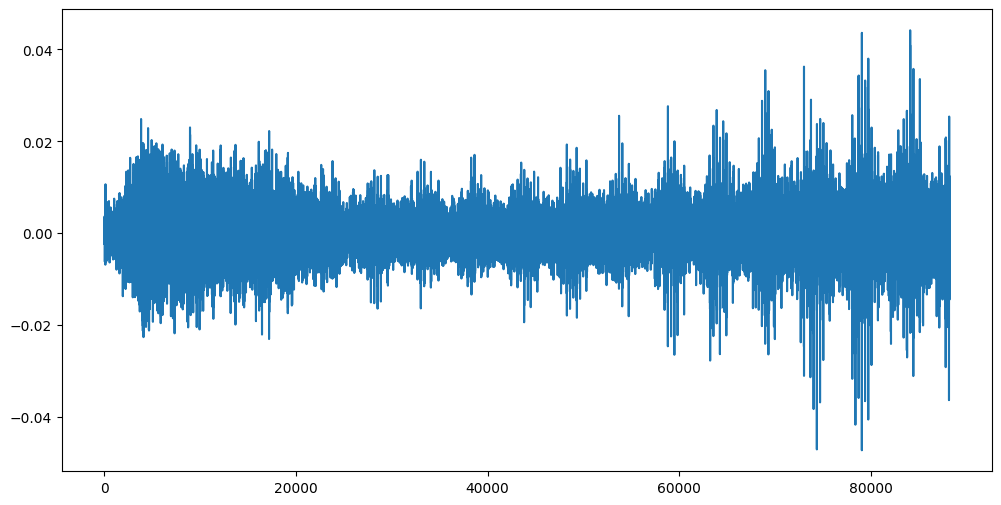

In [71]:
plt.figure(figsize=(12,6))
plt.plot(librosa_audio_data)
plt.show()

In [77]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
mfccs.shape

(40, 173)

In [78]:
mfccs

array([[-4.2137836e+02, -4.0379663e+02, -4.0625195e+02, ...,
        -3.4021005e+02, -3.1742072e+02, -3.1462756e+02],
       [ 5.2913979e+01,  5.8164658e+01,  5.2902252e+01, ...,
         5.6466690e+01,  5.2834862e+01,  4.6273010e+01],
       [-2.3076538e+01, -3.0781887e+01, -4.1717445e+01, ...,
        -3.9097675e+01, -3.0603064e+01, -2.2010401e+01],
       ...,
       [-2.3499579e+00,  2.8357363e+00,  7.4772420e+00, ...,
         7.4736881e+00,  3.2660704e+00,  1.7195081e+00],
       [-6.3494520e+00, -4.7925072e+00, -2.4946666e+00, ...,
        -6.7416649e+00, -5.3278880e+00, -6.7995749e+00],
       [ 1.5612891e+00,  6.6152018e-01, -2.0584626e+00, ...,
        -3.8222885e-01,  2.4830561e+00,  1.3765693e+00]], dtype=float32)

In [80]:
audio_dataset_path = "/Users/akselkantar/Desktop/Python-Projects/UrbanSoundClassification/UrbanSounds/audio/"
metadata = pd.read_csv("/Users/akselkantar/Desktop/Python-Projects/UrbanSoundClassification/UrbanSounds/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [81]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [82]:
extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), "fold" + str(row["fold"]) + "/", str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3554it [03:26, 17.36it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [08:01, 21.56it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [08:22, 17.36it/s]


In [83]:
extracted_features_DF = pd.DataFrame(extracted_features, columns=["features", "class"])
extracted_features_DF.head()

,features,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [84]:
X = np.array(extracted_features_DF["features"].tolist())
y = np.array(extracted_features_DF["class"].tolist())

In [85]:
X.shape

(8732, 40)

In [86]:
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [87]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [89]:
X_train

array([[-1.73381531e+02,  2.39769073e+02, -7.35220490e+01, ...,
         1.45096421e+00, -4.30629313e-01,  2.05800843e+00],
       [-3.03064728e+02,  2.87015038e+01, -1.29687901e+01, ...,
         4.38094473e+00, -2.38838243e+00,  6.24314165e+00],
       [-1.53503616e+02,  7.93481674e+01, -1.45454512e+01, ...,
         4.26682520e+00, -9.97954905e-01,  3.55976510e+00],
       ...,
       [-2.86656738e+02,  1.20506676e+02, -3.79326897e+01, ...,
        -8.70303929e-01,  1.84046790e-01, -1.86173522e+00],
       [-3.06090454e+02,  1.51097275e+02, -3.25893593e+01, ...,
        -1.83721220e+00,  1.08398724e+00,  1.76379216e+00],
       [-3.39418823e+02,  1.62252579e+02, -3.11588688e+01, ...,
         9.07916307e-01,  3.29654121e+00, -3.37947875e-01]], dtype=float32)

In [90]:
num_labels = 10

In [122]:
model = Sequential()
model.add(Dense(128, input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(256, input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(256, input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation("softmax"))



In [123]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               5248      
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)              

In [124]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [125]:
epoch_count = 80
batch_size = 64

In [139]:
results = model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch_count, validation_data=(X_test, y_test), verbose=1)

Epoch 1/80
110/110 [==============================] - 1s 5ms/step - loss: 0.7553 - accuracy: 0.7432 - val_loss: 0.5719 - val_accuracy: 0.8317
Epoch 2/80
110/110 [==============================] - 0s 3ms/step - loss: 0.7344 - accuracy: 0.7546 - val_loss: 0.5631 - val_accuracy: 0.8220
Epoch 3/80
110/110 [==============================] - 0s 4ms/step - loss: 0.7517 - accuracy: 0.7493 - val_loss: 0.5887 - val_accuracy: 0.8157
Epoch 4/80
110/110 [==============================] - 1s 5ms/step - loss: 0.7520 - accuracy: 0.7446 - val_loss: 0.5849 - val_accuracy: 0.8037
Epoch 5/80
110/110 [==============================] - 1s 5ms/step - loss: 0.7757 - accuracy: 0.7440 - val_loss: 0.5859 - val_accuracy: 0.8168
Epoch 6/80
110/110 [==============================] - 1s 6ms/step - loss: 0.7547 - accuracy: 0.7436 - val_loss: 0.5689 - val_accuracy: 0.8248
Epoch 7/80
110/110 [==============================] - 0s 4ms/step - loss: 0.7572 - accuracy: 0.7427 - val_loss: 0.5875 - val_accuracy: 0.8174
Epoch 

In [149]:
validation_test_set_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(validation_test_set_accuracy[1])

0.8391528129577637


In [141]:
filename = "/Users/akselkantar/Desktop/Python-Projects/UrbanSoundClassification/UrbanSounds/audio/fold7/14772-7-2-0.wav"
sound_signal, sample_rate = librosa.load(filename,res_type="kaiser_fast")
mfcc_features = librosa.feature.mfcc(y = sound_signal, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfcc_features.T, axis = 0) 

In [142]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

In [143]:
result_array = model.predict(mfccs_scaled_features)

1/1 [==============================] - 0s 30ms/step


In [144]:
print(result_array)

[[1.7891232e-11 1.0218204e-06 2.4385927e-09 6.7841150e-09 2.1483915e-02
  1.0631286e-07 4.4098036e-09 9.7849232e-01 2.1071406e-12 2.2521959e-05]]


In [145]:
result_classes = ["air_conditioner",
"car_horn",
"children_playing",
"dog_bark",
"drilling",
"engine_idling",
"gun_shot",
"jackhammer",
"siren",
"street_music"]

In [146]:
result = np.argmax(result_array[0])

In [147]:
result_classes[result]

'jackhammer'